**Anggota Kelompok:**
*   Gaizkia Adeline Atmaka - 2501972493
*   Joshua Evans Setiyawan - 2501972354
*   Shelly Alfianda - 2501972625

Link Dataset : https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import files
# import io

In [ ]:
df_app= pd.read_csv("./application_record.csv")
df_credit= pd.read_csv("./credit_record.csv")

In [ ]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df_app['ID'].nunique()

438510

Ada 438510 data yang berbeda, dan ternyata ada duplikat, sehingga duplikat dapat didrop

Dari info, hanya ada 1 type yang punya null yaitu OCCUPATION_TYPE

Karena sulit sekali untuk diimpute dan nullnya banyak, maka kolomnya akan didrop

Dapat dilihat kembali di info, ada beberapa kolom yang tidak dibutuhkan dalam prediksi, yaitu nomor telepon, email, dan tanggal lahir sehingga mereka pun juga dapat didrop.

In [ ]:
df_appclean= df_app.copy()
df_appclean2= df_appclean.drop_duplicates('ID', keep='last') #asumsikan yang yang duplikat itu karena diupdate
df_appclean3= df_appclean2.drop(['OCCUPATION_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'DAYS_BIRTH'], axis=1)

In [ ]:
df_appclean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_EMPLOYED        438510 non-null  int64  
 11  CNT_FAM_MEMBERS      438510 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 43.5+ MB


Sekarang kolom application sudah lebih bisa untuk dipetakan, sekarang kita akan melihat credit recordnya.

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_credit['ID'].nunique()

45985

Ada 45985 unique ID di credit score. Dan karena

In [ ]:
status_clean= df_credit.groupby(['ID']).agg(max).reset_index()
status_clean2=status_clean.drop(['MONTHS_BALANCE'], axis=1)
status_clean2.head()

,ID,STATUS
0,5001711,X
1,5001712,C
2,5001713,X
3,5001714,X
4,5001715,X


In [ ]:
status_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      45985 non-null  int64 
 1   STATUS  45985 non-null  object
dtypes: int64(1), object(1)
memory usage: 718.6+ KB


Sekarang 45985 ID unik tersebut telah disatukan dan months_balance telah didrop

Disini, kita akan menyatukan dataframe status_clean2 dengan df_app menggunakan merge inner join

In [ ]:
df_merge= pd.merge(df_appclean3, status_clean2, how='inner', on=['ID'])
df_merge.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,2.0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,2.0,X
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,2.0,X
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1.0,X
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1.0,X


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  CNT_FAM_MEMBERS      36457 non-null  float64
 12  STATUS               36457 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3.9+ MB


Setelah mengjoin table, sekarang kita akan mengencode data-data objectnya

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded= df_merge.copy()
label_encoders = {}


for x in df_merge:
  if df_encoded[x].dtypes == 'object':
    encoder= LabelEncoder()
    df_encoded[x]= encoder.fit_transform(df_encoded[x])
    label_encoders[x] = encoder


for column, encoded in label_encoders.items():
    encoded_labels = encoded.classes_
    print(f"Encoded labels for column '{column}':")
    for label, category in enumerate(encoded_labels):
        print(f"Label {label}: {category}")
    print()
    print()

Encoded labels for column 'CODE_GENDER':
Label 0: F
Label 1: M


Encoded labels for column 'FLAG_OWN_CAR':
Label 0: N
Label 1: Y


Encoded labels for column 'FLAG_OWN_REALTY':
Label 0: N
Label 1: Y


Encoded labels for column 'NAME_INCOME_TYPE':
Label 0: Commercial associate
Label 1: Pensioner
Label 2: State servant
Label 3: Student
Label 4: Working


Encoded labels for column 'NAME_EDUCATION_TYPE':
Label 0: Academic degree
Label 1: Higher education
Label 2: Incomplete higher
Label 3: Lower secondary
Label 4: Secondary / secondary special


Encoded labels for column 'NAME_FAMILY_STATUS':
Label 0: Civil marriage
Label 1: Married
Label 2: Separated
Label 3: Single / not married
Label 4: Widow


Encoded labels for column 'NAME_HOUSING_TYPE':
Label 0: Co-op apartment
Label 1: House / apartment
Label 2: Municipal apartment
Label 3: Office apartment
Label 4: Rented apartment
Label 5: With parents


Encoded labels for column 'STATUS':
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Lab

Encode berhasil dilakukan. Uraian label dapat dilihat di atas

In [ ]:
df_encoded.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-4542,2.0,7
1,5008805,1,1,1,0,427500.0,4,1,0,4,-4542,2.0,7
2,5008806,1,1,1,0,112500.0,4,4,1,1,-1134,2.0,7
3,5008808,0,0,1,0,270000.0,0,4,3,1,-3051,1.0,7
4,5008809,0,0,1,0,270000.0,0,4,3,1,-3051,1.0,7


In [ ]:
def status_change(x):
  if((x==7)|(x==6)):
    return 1
  else:
    return 0

df_clean= df_encoded.copy()
df_clean['CNT_FAM_MEMBERS']=df_clean['CNT_FAM_MEMBERS'].astype(int)
df_clean['STATUS']= df_clean['STATUS'].apply(status_change)

df_clean.loc[df_clean.DAYS_EMPLOYED >0, "DAYS_EMPLOYED"]= 0
df_clean.loc[df_clean.DAYS_EMPLOYED <0, "DAYS_EMPLOYED"]= 1


df_final=df_clean.copy()

Disini jika data dari DAYS_EMPLOYED positif kami ganti dengan 0 untuk memudahkan pengklasifikasian bahwa orang tersebut tidak bekerja (unemployed)
sedangkan untuk yang negatif kami ganti dengan 1 untuk mengklasifikasikan bahwa orang tersebut bekerja

In [ ]:
df_final.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,2,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,2,1
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,2,1
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,1,1
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,1,1


In [ ]:
df_final['STATUS'].value_counts()

1    31407
0     5050
Name: STATUS, dtype: int64

Karena datanya imbalance, maka kami akan menoversampling data minoritas yaitu 0. Namun sebelum melakukannya, kami akan split training, validation, dan testing data. Dan kami akan melakukan oversampling di training dan validation data, namun tidak di testing data untuk menghindari bias.

In [ ]:
from sklearn.model_selection import train_test_split

feat= df_final.drop(['STATUS'], axis=1)
target= df_final['STATUS']

X_presplit, X_pretest, Y_presplit, Y_pretest= train_test_split(feat, target, test_size=0.15, random_state=17)

In [ ]:
print(pd.Series(Y_presplit).value_counts())

1    26682
0     4306
Name: STATUS, dtype: int64


In [ ]:
print(pd.Series(Y_pretest).value_counts())

1    4725
0     744
Name: STATUS, dtype: int64


Karena data di testing cukup imbalanced, maka kami akan mencoba untuk menyeimbangkannya, kami akan mencoba untuk meningkatkan nilai 0 ke angka 1200

In [ ]:
current_test0= np.sum(Y_pretest==0)
current_test1= np.sum(Y_pretest==1)
desired_test0= 1200
transfer_totest0= desired_test0-current_test0
transfer_fromtest1 = transfer_totest0


In [ ]:
indices_to_transfer_target0 = np.random.choice(np.where(Y_presplit == 0)[0], size=transfer_totest0, replace=False)
indices_to_transfer_target1 = np.random.choice(np.where(Y_pretest == 1)[0], size=transfer_fromtest1, replace=False)

In [ ]:
Xsplit0= X_presplit.iloc[indices_to_transfer_target0]
Ysplit0= Y_presplit.iloc[indices_to_transfer_target0]
Xtest1= X_pretest.iloc[indices_to_transfer_target1]
Ytest1= Y_pretest.iloc[indices_to_transfer_target1]

In [ ]:
X_test = pd.concat([X_pretest, Xsplit0])
Y_test = pd.concat([Y_pretest, Ysplit0])
X_split = pd.concat([X_presplit, Xtest1])
Y_split = pd.concat([Y_presplit, Ytest1])

In [ ]:
X_split = X_split.drop(Xsplit0.index)
Y_split = Y_split.drop(Ysplit0.index)
X_test = X_test.drop(Xtest1.index)
Y_test = Y_test.drop(Ytest1.index)

In [ ]:
print("Adjusted Split Set Target 1 Count:", np.sum(Y_split == 1))
print("Adjusted Split Set Target 0 Count:", np.sum(Y_split == 0))
print("Adjusted Test Set Target 1 Count:", np.sum(Y_test == 1))
print("Adjusted Test Set Target 0 Count:", np.sum(Y_test == 0))

Adjusted Split Set Target 1 Count: 27138
Adjusted Split Set Target 0 Count: 3850
Adjusted Test Set Target 1 Count: 4269
Adjusted Test Set Target 0 Count: 1200


In [ ]:
#Kami akan menggunakan SMOTE untuk oversampling

from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1)

X_splitfinal, Y_splitfinal = smote.fit_resample(X_split,Y_split)
X_train, X_valid, Y_train, Y_valid= train_test_split(X_splitfinal, Y_splitfinal, test_size=0.2)

#Sehingga split menjadi Training 68%, Validation 17%, dan Testing 15%

#Value after SMOTE
print(pd.Series(Y_train).value_counts())
print(pd.Series(Y_valid).value_counts())

1    21715
0    21705
Name: STATUS, dtype: int64
0    5433
1    5423
Name: STATUS, dtype: int64


c:\Anaconda\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
DT= DecisionTreeClassifier()
RF= RandomForestClassifier(n_jobs=-1)
KNN = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
NB= GaussianNB()
K_Fold = KFold(n_splits=5, shuffle=True)

In [ ]:
estimators= [('DT', DT), ('RF', RF), ('KNN', KNN), ('NB', NB)]
votingsoft= VotingClassifier(estimators=estimators, voting="soft")
votinghard= VotingClassifier(estimators=estimators, voting="hard")
votingsoft.fit(X_train, Y_train)

validsoft= votingsoft.predict(X_valid)

print(classification_report(validsoft, Y_valid))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5438
           1       0.87      0.87      0.87      5418

    accuracy                           0.87     10856
   macro avg       0.87      0.87      0.87     10856
weighted avg       0.87      0.87      0.87     10856



In [ ]:
testsoft= votingsoft.predict(X_test)

print(classification_report(testsoft, Y_test))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36       942
           1       0.87      0.82      0.84      4527

    accuracy                           0.75      5469
   macro avg       0.59      0.61      0.60      5469
weighted avg       0.77      0.75      0.76      5469



In [ ]:
scoresoft = cross_val_score(votingsoft, X_train, Y_train, cv=K_Fold, scoring='f1')
scoresoft

array([0.86122308, 0.85947938, 0.86008603, 0.86003917, 0.86438733])

In [ ]:
scorehard = cross_val_score(votinghard, X_train, Y_train, cv=K_Fold, scoring='f1')
scorehard

array([0.80106775, 0.80164229, 0.81219822, 0.8029881 , 0.80722738])

Dari percobaan diatas, kami menyimpulkan bahwa penggunaan SMOTE belum membuat AI bekerja dengan baik, bahkan dibantu dengan Soft Voting. Sehingga kami akan mencoba untuk melakukan hyperparameter tuning, bagging classifier, dan voting (Hard dan Soft) secara bersamaan, lalu ditambah dengan boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
BaggingDT= BaggingClassifier(DT, n_jobs=-1)
BaggingRF= BaggingClassifier(RF, n_estimators=5, n_jobs=-1)
BaggingKNN= BaggingClassifier(KNN, n_estimators=5, n_jobs=-1)
BaggingNB= BaggingClassifier(NB, n_jobs=-1)

In [ ]:
DTparameters={
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4]
}
KNNparameters = {
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance'],
}
RFparameters = {
    'estimator__n_estimators': [10,20],
    'estimator__max_depth': [None, 3, 5, 7],
    'estimator__min_samples_leaf': [1, 2, 4]
}

In [ ]:
GridDT = GridSearchCV(BaggingDT, DTparameters, cv=5)
GridDT.fit(X_train, Y_train)
GridDTvalid= GridDT.predict(X_valid)
print(classification_report(GridDTvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5373
           1       0.89      0.88      0.88      5483

    accuracy                           0.88     10856
   macro avg       0.88      0.88      0.88     10856
weighted avg       0.88      0.88      0.88     10856



In [ ]:
GridDTtest= GridDT.predict(X_test)
print(classification_report(GridDTtest, Y_test))

              precision    recall  f1-score   support

           0       0.31      0.42      0.35       877
           1       0.88      0.82      0.85      4592

    accuracy                           0.75      5469
   macro avg       0.59      0.62      0.60      5469
weighted avg       0.79      0.75      0.77      5469



In [ ]:
GridRF= GridSearchCV(BaggingRF, RFparameters, cv=5)
GridRF.fit(X_train, Y_train)
GridRFvalid= GridRF.predict(X_valid)
print(classification_report(GridRFvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5369
           1       0.88      0.87      0.88      5487

    accuracy                           0.87     10856
   macro avg       0.87      0.87      0.87     10856
weighted avg       0.87      0.87      0.87     10856



In [ ]:
GridRFtest= GridRF.predict(X_test)
print(classification_report(GridRFtest, Y_test))

              precision    recall  f1-score   support

           0       0.30      0.42      0.35       866
           1       0.88      0.82      0.85      4603

    accuracy                           0.76      5469
   macro avg       0.59      0.62      0.60      5469
weighted avg       0.79      0.76      0.77      5469



In [ ]:
GridKNN=GridSearchCV(BaggingKNN, KNNparameters, cv=5)
GridKNN.fit(X_train, Y_train)
GridKNNvalid= GridKNN.predict(X_valid)
print(classification_report(GridKNNvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78      4904
           1       0.84      0.77      0.80      5952

    accuracy                           0.79     10856
   macro avg       0.79      0.80      0.79     10856
weighted avg       0.80      0.79      0.79     10856



In [ ]:
GridKNNtest= GridKNN.predict(X_test)
print(classification_report(GridKNNtest, Y_test))

              precision    recall  f1-score   support

           0       0.35      0.39      0.37      1083
           1       0.85      0.82      0.83      4386

    accuracy                           0.74      5469
   macro avg       0.60      0.61      0.60      5469
weighted avg       0.75      0.74      0.74      5469



In [ ]:
best_DT = GridDT.best_estimator_.estimator_
best_RF = GridRF.best_estimator_.estimator_
best_KNN = GridKNN.best_estimator_.estimator_

bestestimator= [('DT', best_DT),
                ('RF', best_RF),
                ('KNN', best_KNN),
                ('NB', BaggingNB)]
# bestestimator = [DT, best_DT, RF, best_RF, KNN, best_KNN, NB, BaggingNB]
# bestestimator= list(bestestimator)
bestsoftvoting= VotingClassifier(estimators= bestestimator, voting= 'soft')

In [ ]:
bestsoftvoting.fit(X_train, Y_train)
softpredvalid= bestsoftvoting.predict(X_valid)
print(classification_report(softpredvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5447
           1       0.88      0.88      0.88      5409

    accuracy                           0.88     10856
   macro avg       0.88      0.88      0.88     10856
weighted avg       0.88      0.88      0.88     10856



In [ ]:
softpredtest= bestsoftvoting.predict(X_test)
print(classification_report(softpredtest, Y_test))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36       921
           1       0.87      0.82      0.85      4548

    accuracy                           0.75      5469
   macro avg       0.60      0.62      0.60      5469
weighted avg       0.78      0.75      0.76      5469



In [ ]:
bestsoftscore= cross_val_score(bestsoftvoting, X_train, Y_train, cv=K_Fold, scoring='f1')
bestsoftscore

array([0.86495805, 0.86290788, 0.8616117 , 0.86466682, 0.85355166])

In [ ]:
besthardvoting= VotingClassifier(estimators= bestestimator, voting= 'hard')
besthardvoting.fit(X_train, Y_train)
hardpredvalid= besthardvoting.predict(X_valid)
print(classification_report(hardpredvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86      6229
           1       0.78      0.91      0.84      4627

    accuracy                           0.85     10856
   macro avg       0.85      0.86      0.85     10856
weighted avg       0.86      0.85      0.85     10856



In [ ]:
hardpredtest= besthardvoting.predict(X_test)
print(classification_report(hardpredtest, Y_test))

              precision    recall  f1-score   support

           0       0.45      0.35      0.39      1514
           1       0.77      0.83      0.80      3955

    accuracy                           0.70      5469
   macro avg       0.61      0.59      0.60      5469
weighted avg       0.68      0.70      0.69      5469



In [ ]:
besthardscore= cross_val_score(besthardvoting, X_train, Y_train, cv=K_Fold, scoring='f1')
besthardscore

array([0.81680071, 0.81499243, 0.81667291, 0.8239367 , 0.8187296 ])

Disini kami akan menggunakan soft voting dibanding hard voting, lalu kami akan melakukan boosting pada AI

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc= AdaBoostClassifier(estimator=best_RF, n_estimators=100)
abc.fit(X_train, Y_train)
abcpredvalid= abc.predict(X_valid)
print(classification_report(abcpredvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5491
           1       0.87      0.88      0.88      5365

    accuracy                           0.88     10856
   macro avg       0.88      0.88      0.88     10856
weighted avg       0.88      0.88      0.88     10856



In [ ]:
abcpredtest= abc.predict(X_test)
print(classification_report(abcpredtest, Y_test))

              precision    recall  f1-score   support

           0       0.31      0.41      0.35       911
           1       0.87      0.82      0.84      4558

    accuracy                           0.75      5469
   macro avg       0.59      0.61      0.60      5469
weighted avg       0.78      0.75      0.76      5469



In [ ]:
abcscore= cross_val_score(abc, X_train, Y_train, cv=K_Fold, scoring='f1')
abcscore

array([0.8674096 , 0.86761475, 0.86547812, 0.87540304, 0.86889755])

In [ ]:
import xgboost as xgb
xgb= xgb.XGBClassifier(
    n_estimators=2000,
    max_depth=10,
    learning_rate=0.07,
)
xgb.fit(X_train, Y_train)
xgbpredvalid= xgb.predict(X_valid)
print(classification_report(xgbpredvalid, Y_valid))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5350
           1       0.89      0.88      0.89      5506

    accuracy                           0.89     10856
   macro avg       0.89      0.89      0.89     10856
weighted avg       0.89      0.89      0.89     10856



In [ ]:
xgbpredtest= xgb.predict(X_test)
print(classification_report(xgbpredtest, Y_test))

              precision    recall  f1-score   support

           0       0.29      0.42      0.34       829
           1       0.89      0.82      0.85      4640

    accuracy                           0.76      5469
   macro avg       0.59      0.62      0.60      5469
weighted avg       0.80      0.76      0.77      5469



In [ ]:
xgbscore= cross_val_score(xgb, X_train, Y_train, cv=K_Fold, scoring='f1')
xgbscore

array([0.87851544, 0.86918571, 0.87684399, 0.87987988, 0.87251674])

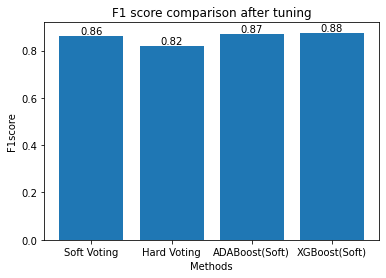

In [ ]:
import matplotlib.pyplot as plt
F1mean=[np.mean(softscore), np.mean(hardscore), np.mean(bestsoftscore),
np.mean(besthardscore), np.mean(abcscore), np.mean(xgbscore)]
label=['Soft After Tuning', 'Hard After Tuning', 'ADABoost(Soft)', 'XGBoost(Soft)']
plt.bar(label, F1mean)
plt.xlabel('Methods')
plt.ylabel('F1score')
plt.title('F1 score comparison after tuning')
for i, v in enumerate(F1mean):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

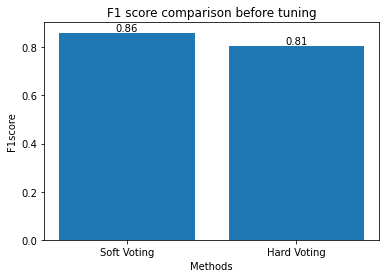

In [ ]:
beforemean=[np.mean(scoresoft), np.mean(scorehard)]
beforelabel=['Soft Voting', 'Hard Voting']

plt.bar(beforelabel, beforemean)
plt.xlabel('Methods')
plt.ylabel('F1score')
plt.title('F1 score comparison before tuning')
for i, v in enumerate(beforemean):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()